In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Read the dataset and understand the features and target variable.

In [13]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt')
df.head(5)

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [14]:
df.dtypes

P      object
P.1    object
A      object
A.1    object
A.2    object
P.2    object
NB     object
dtype: object

In [15]:
df.shape

(249, 7)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["P"] = le.fit_transform(df["P"])
df["P.1"] = le.fit_transform(df["P.1"])
df["A"] = le.fit_transform(df["A"])
df["A.1"] = le.fit_transform(df["A.1"])
df["A.2"] = le.fit_transform(df["A.2"])
df["P.2"] = le.fit_transform(df["P.2"])

In [17]:
from sklearn.preprocessing import OneHotEncoder 

onehotencoder = OneHotEncoder() 
  
X = onehotencoder.fit_transform(df).toarray()

In [18]:
X

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [19]:
X.shape

(249, 20)

In [20]:
#X=pd.get_dummies(df.iloc[:,0:6])
y=df.iloc[:,6:]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [22]:
from sklearn.decomposition import PCA

In [23]:
X_centered = X - X.mean(axis=0)

In [24]:
pca = PCA(n_components=6)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_pca = pca.transform(X_centered)

In [26]:
X_pca.shape

(249, 6)

In [27]:
pca.components_

array([[-5.87328305e-02,  1.24720432e-01, -6.59876012e-02,
        -6.05102631e-02,  1.89784878e-01, -1.29274615e-01,
        -1.94000954e-01,  3.48062984e-01, -1.54062030e-01,
        -1.13069986e-01,  3.25825696e-01, -2.12755709e-01,
        -1.27283130e-01,  3.83645647e-01, -2.56362517e-01,
        -5.63276835e-03,  1.34561888e-01, -1.28929120e-01,
         3.93477829e-01, -3.93477829e-01],
       [ 4.59741576e-01, -4.46909973e-01, -1.28316028e-02,
         4.15100861e-01, -4.07524416e-01, -7.57644502e-03,
        -6.87971255e-02,  1.80382408e-01, -1.11585282e-01,
        -1.50389366e-01,  1.39076901e-01,  1.13124649e-02,
        -3.76761784e-02,  5.92580538e-02, -2.15818753e-02,
         1.99817790e-01, -3.05083013e-01,  1.05265223e-01,
         6.71283534e-02, -6.71283534e-02],
       [-1.96195662e-01, -2.66216344e-01,  4.62412006e-01,
         2.15599396e-01, -2.18314003e-01,  2.71460685e-03,
        -1.54486699e-01, -5.86080395e-02,  2.13094739e-01,
        -1.98136019e-02,  1.5

In [28]:
pca.explained_variance_

array([1.50057636, 0.48288305, 0.38698863, 0.36675619, 0.32310313,
       0.29537659])

In [29]:
pca.explained_variance_ratio_

array([0.34168999, 0.10995529, 0.08811957, 0.08351252, 0.07357247,
       0.06725897])

In [30]:
cov_matrix = np.cov(X_centered)
eigenval, eigenvec = np.linalg.eig(cov_matrix)

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


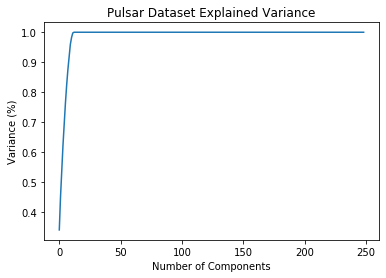

In [31]:
import matplotlib.pyplot as plt
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [32]:
X_pca

array([[-0.5222683 , -1.37625475, -0.54063661, -0.16417954,  1.00879602,
        -0.26974128],
       [-1.09621136,  0.85792288, -0.69372972, -0.50091752,  1.28350391,
         0.1443617 ],
       [-1.48435302,  0.0031278 ,  0.54262619,  0.76404092, -0.99962241,
         0.27043746],
       ...,
       [ 1.57312249,  0.30023353,  0.06823094, -0.18854249,  0.16698525,
        -0.42507222],
       [ 1.75657575, -0.60641801, -0.00178975, -0.15787678, -0.12393663,
        -0.27371082],
       [ 0.91474428,  0.23562693, -0.21623862,  0.37336232, -0.24158132,
         0.84617849]])

In [33]:
from sklearn.cluster import KMeans

In [34]:
# Number of clusters

kmeans = KMeans(n_clusters=2)

# Fitting the input data

kmeans = kmeans.fit(X_pca)

In [35]:
# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.36850462  0.07513043 -0.0081195   0.05718186  0.01110803  0.00642294]
 [-1.03119715 -0.05661236  0.00611822 -0.04308774 -0.00837013 -0.00483982]]


In [36]:
cluster_range = range( 1, 10)
colnames = ["col1", "col2","col3","col4","col5","col6"]
prediction= kmeans.predict(X_pca)
#X["clusters"] = prediction
X_pca_df = pd.DataFrame(X_pca, columns= colnames)
X_pca_df["group"] = prediction

In [37]:
for i in cluster_range:
    points = np.array(X_pca_df.loc[X_pca_df['group'] == i])
    
points

array([], shape=(0, 7), dtype=float64)

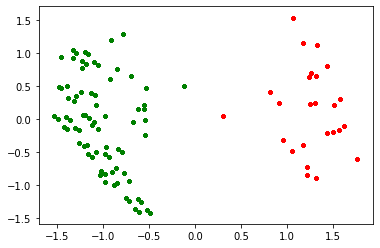

In [38]:
# Getting the cluster labels

labels = kmeans.labels_
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_pca_df.loc[X_pca_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1],s=7, c=colors[i])



In [39]:
X_pca_df

,col1,col2,col3,col4,col5,col6,group
0,-0.522268,-1.376255,-0.540637,-0.164180,1.008796,-0.269741,1
1,-1.096211,0.857923,-0.693730,-0.500918,1.283504,0.144362,1
2,-1.484353,0.003128,0.542626,0.764041,-0.999622,0.270437,1
3,-0.711094,-1.241247,0.283583,-0.934296,-0.802521,-0.235522,1
4,-1.285038,0.992931,0.130489,-1.271034,-0.527813,0.178581,1
...,...,...,...,...,...,...,...
244,1.214512,-0.855598,-0.097668,-0.118123,0.132301,-0.586369,0
245,1.565868,-0.172340,0.726839,0.429952,-0.173199,0.086867,0
246,1.573122,0.300234,0.068231,-0.188542,0.166985,-0.425072,0
247,1.756576,-0.606418,-0.001790,-0.157877,-0.123937,-0.273711,0


In [40]:
pca.transform(X_test)

array([[-1.07600411,  0.65611664, -0.67333395,  0.30043049,  1.05847989,
        -0.05499436],
       [ 1.58101986, -0.31372371,  0.27322075,  0.27440209,  0.0716555 ,
        -0.82581067],
       [ 1.90007935, -0.71367169,  0.05219214, -0.21538188, -0.18219591,
        -0.32386757],
       [ 1.32098901, -0.49823715, -0.779858  , -0.54656899,  0.32249596,
         0.84526071],
       [ 1.3862932 ,  0.51930183, -0.20450777,  0.33739896, -0.36517465,
         0.09239749],
       [-0.81788603, -0.52587517,  0.77147783, -1.05974427, -0.64206842,
        -0.5167386 ],
       [-1.31202399,  0.36133959,  0.44191143,  0.34004657, -0.85035405,
        -0.02409009],
       [ 1.57643143,  0.69788067, -0.53481437, -0.48417684, -0.12619976,
         0.32129507],
       [-1.31202399,  0.36133959,  0.44191143,  0.34004657, -0.85035405,
        -0.02409009],
       [ 1.44588031,  0.13075492,  0.09020718,  0.99317121, -0.63314883,
         0.68403522],
       [ 1.05824789,  0.12837325, -0.16225673,  0.

In [41]:
prediction= kmeans.predict(pca.transform(X_test))
#X["clusters"] = prediction
X_pca_df_test = pd.DataFrame(pca.transform(X_test), columns= colnames)
X_pca_df_test["group"] = prediction

In [42]:
X_pca_df_test

,col1,col2,col3,col4,col5,col6,group
0,-1.076004,0.656117,-0.673334,0.300430,1.058480,-0.054994,1
1,1.581020,-0.313724,0.273221,0.274402,0.071655,-0.825811,0
2,1.900079,-0.713672,0.052192,-0.215382,-0.182196,-0.323868,0
3,1.320989,-0.498237,-0.779858,-0.546569,0.322496,0.845261,0
4,1.386293,0.519302,-0.204508,0.337399,-0.365175,0.092397,0
5,-0.817886,-0.525875,0.771478,-1.059744,-0.642068,-0.516739,1
6,-1.312024,0.361340,0.441911,0.340047,-0.850354,-0.024090,1
7,1.576431,0.697881,-0.534814,-0.484177,-0.126200,0.321295,0
8,-1.312024,0.361340,0.441911,0.340047,-0.850354,-0.024090,1
9,1.445880,0.130755,0.090207,0.993171,-0.633149,0.684035,0


In [43]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm



In [44]:
svc = svm.SVC(C=0.01, kernel='linear').fit(X_train, y_train)

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[21,  0],
       [ 0, 29]])

In [47]:
svc.score(X_test,y_test)

1.0